In [2]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

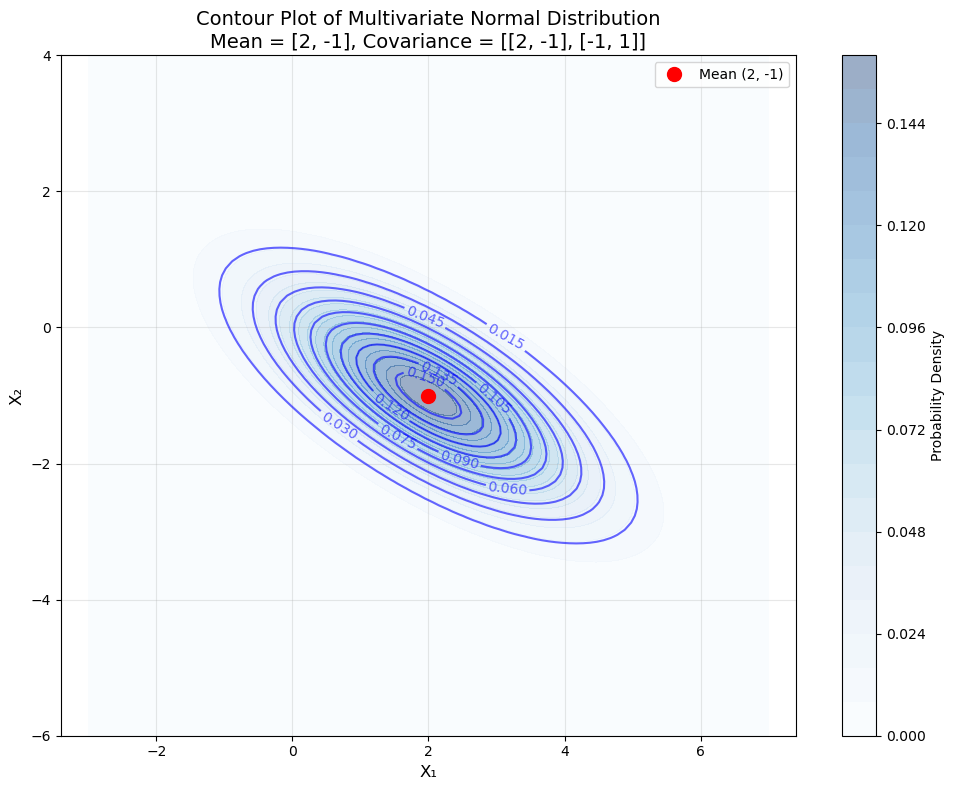

In [2]:
# Define the parameters for the multivariate normal distribution
mean = np.array([2, -1])  # Mean vector [2; -1]
cov = np.array([[2, -1],   # Covariance matrix [2 -1; -1 1]
                [-1, 1]])

# Create a grid of points for the contour plot
x = np.linspace(-3, 7, 100)
y = np.linspace(-6, 4, 100)
X, Y = np.meshgrid(x, y)

# Stack the grid points into a 2D array
pos = np.dstack((X, Y))

# Create the multivariate normal distribution
rv = multivariate_normal(mean, cov)

# Calculate the probability density function values
Z = rv.pdf(pos)

# Create the contour plot
plt.figure(figsize=(10, 8))
contour = plt.contour(X, Y, Z, levels=10, colors='blue', alpha=0.6)
contourf = plt.contourf(X, Y, Z, levels=20, cmap='Blues', alpha=0.4)

# Add contour labels
plt.clabel(contour, inline=True, fontsize=10, fmt='%.3f')

# Add colorbar
plt.colorbar(contourf, label='Probability Density')

# Mark the mean point
plt.plot(mean[0], mean[1], 'ro', markersize=10, label=f'Mean ({mean[0]}, {mean[1]})')

# Add labels and title
plt.xlabel('X₁', fontsize=12)
plt.ylabel('X₂', fontsize=12)
plt.title('Contour Plot of Multivariate Normal Distribution\nMean = [2, -1], Covariance = [[2, -1], [-1, 1]]', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)

# Make the plot square to preserve aspect ratio
plt.axis('equal')

plt.tight_layout()
plt.show()

In [ ]:
# Set random seed for reproducibility
np.random.seed(42)

# Create a random 20x1 mean vector
mean_vector = np.random.randn(20) * 3  # Scale by 3 for more interesting values

# Create a random positive definite 20x20 covariance matrix
# Method: Generate a random matrix A, then compute A @ A.T to ensure positive definiteness
A = np.random.randn(20, 20)
covariance_matrix = A @ A.T

# Add small diagonal term to ensure numerical stability
covariance_matrix += 0.1 * np.eye(20)

print(f"Mean vector shape: {mean_vector.shape}")
print(f"Covariance matrix shape: {covariance_matrix.shape}")
print(f"Mean vector (first 5 elements): {mean_vector[:5]}")
print(f"Diagonal of covariance matrix (first 5 elements): {np.diag(covariance_matrix)[:5]}")

# Verify positive definiteness by checking eigenvalues
eigenvalues = np.linalg.eigvals(covariance_matrix)
print(f"Minimum eigenvalue: {np.min(eigenvalues):.6f} (should be positive)")
print(f"All eigenvalues positive: {np.all(eigenvalues > 0)}")

Mean vector shape: (20,)
Covariance matrix shape: (20, 20)
Mean vector (first 5 elements): [ 1.49014246 -0.4147929   1.94306561  4.56908957 -0.70246012]
Diagonal of covariance matrix (first 5 elements): [19.31973515 12.91627533 23.61775114  9.178567   20.01060754]
Minimum eigenvalue: 0.100030 (should be positive)
All eigenvalues positive: True


In [ ]:
# Create LaTeX representation of the covariance matrix
from IPython.display import display, Markdown, Latex
import pandas as pd

# Create a smaller version for display (first 6x6 submatrix)
display_size = 6
cov_display = covariance_matrix[:display_size, :display_size]

print("LaTeX representation of the covariance matrix structure:")
print("(Showing first 6x6 submatrix as example)")

# Create LaTeX string
latex_str = r"\begin{bmatrix}"
for i in range(display_size):
    row_str = ""
    for j in range(display_size):
        if i == j:
            row_str += "1"
        else:
            row_str += f"0.8^{{{abs(i-j)}}}"
        if j < display_size - 1:
            row_str += " & "
    latex_str += row_str
    if i < display_size - 1:
        latex_str += r" \\"
latex_str += r"\end{bmatrix}"

# Display the LaTeX
display(Latex(r"$$\Sigma = " + latex_str + "$$"))

# Also show the numerical values
print(f"\nNumerical values for the 6x6 submatrix:")
df_display = pd.DataFrame(cov_display, 
                         index=[f'i={i}' for i in range(display_size)],
                         columns=[f'j={j}' for j in range(display_size)])
print(df_display.round(6))

# Show the pattern more clearly
print(f"\nPattern explanation:")
print(f"- Diagonal elements (i=j): 1.0")
print(f"- Off-diagonal elements: 0.8^|i-j|")
print(f"- Examples:")
for dist in range(1, 6):
    print(f"  Distance {dist}: 0.8^{dist} = {0.8**dist:.6f}")

# Visualize the covariance matrix
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.imshow(covariance_matrix, cmap='Blues', aspect='equal')
plt.colorbar(label='Covariance Value')
plt.title('Full 20×20 Covariance Matrix\n$\\Sigma_{ij} = 0.8^{|i-j|}$ (diagonal = 1)', fontsize=12)
plt.xlabel('j')
plt.ylabel('i')

plt.subplot(1, 2, 2)
plt.imshow(cov_display, cmap='Blues', aspect='equal')
plt.colorbar(label='Covariance Value')
plt.title('6×6 Submatrix (Detailed View)', fontsize=12)
plt.xlabel('j')
plt.ylabel('i')
for i in range(display_size):
    for j in range(display_size):
        plt.text(j, i, f'{cov_display[i,j]:.3f}', 
                ha='center', va='center', fontsize=8)

plt.tight_layout()
plt.show()

C:\Users\tmlouw\AppData\Local\Temp\ipykernel_37064\3360474043.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='Position', y='Value', inner='box', palette='viridis')


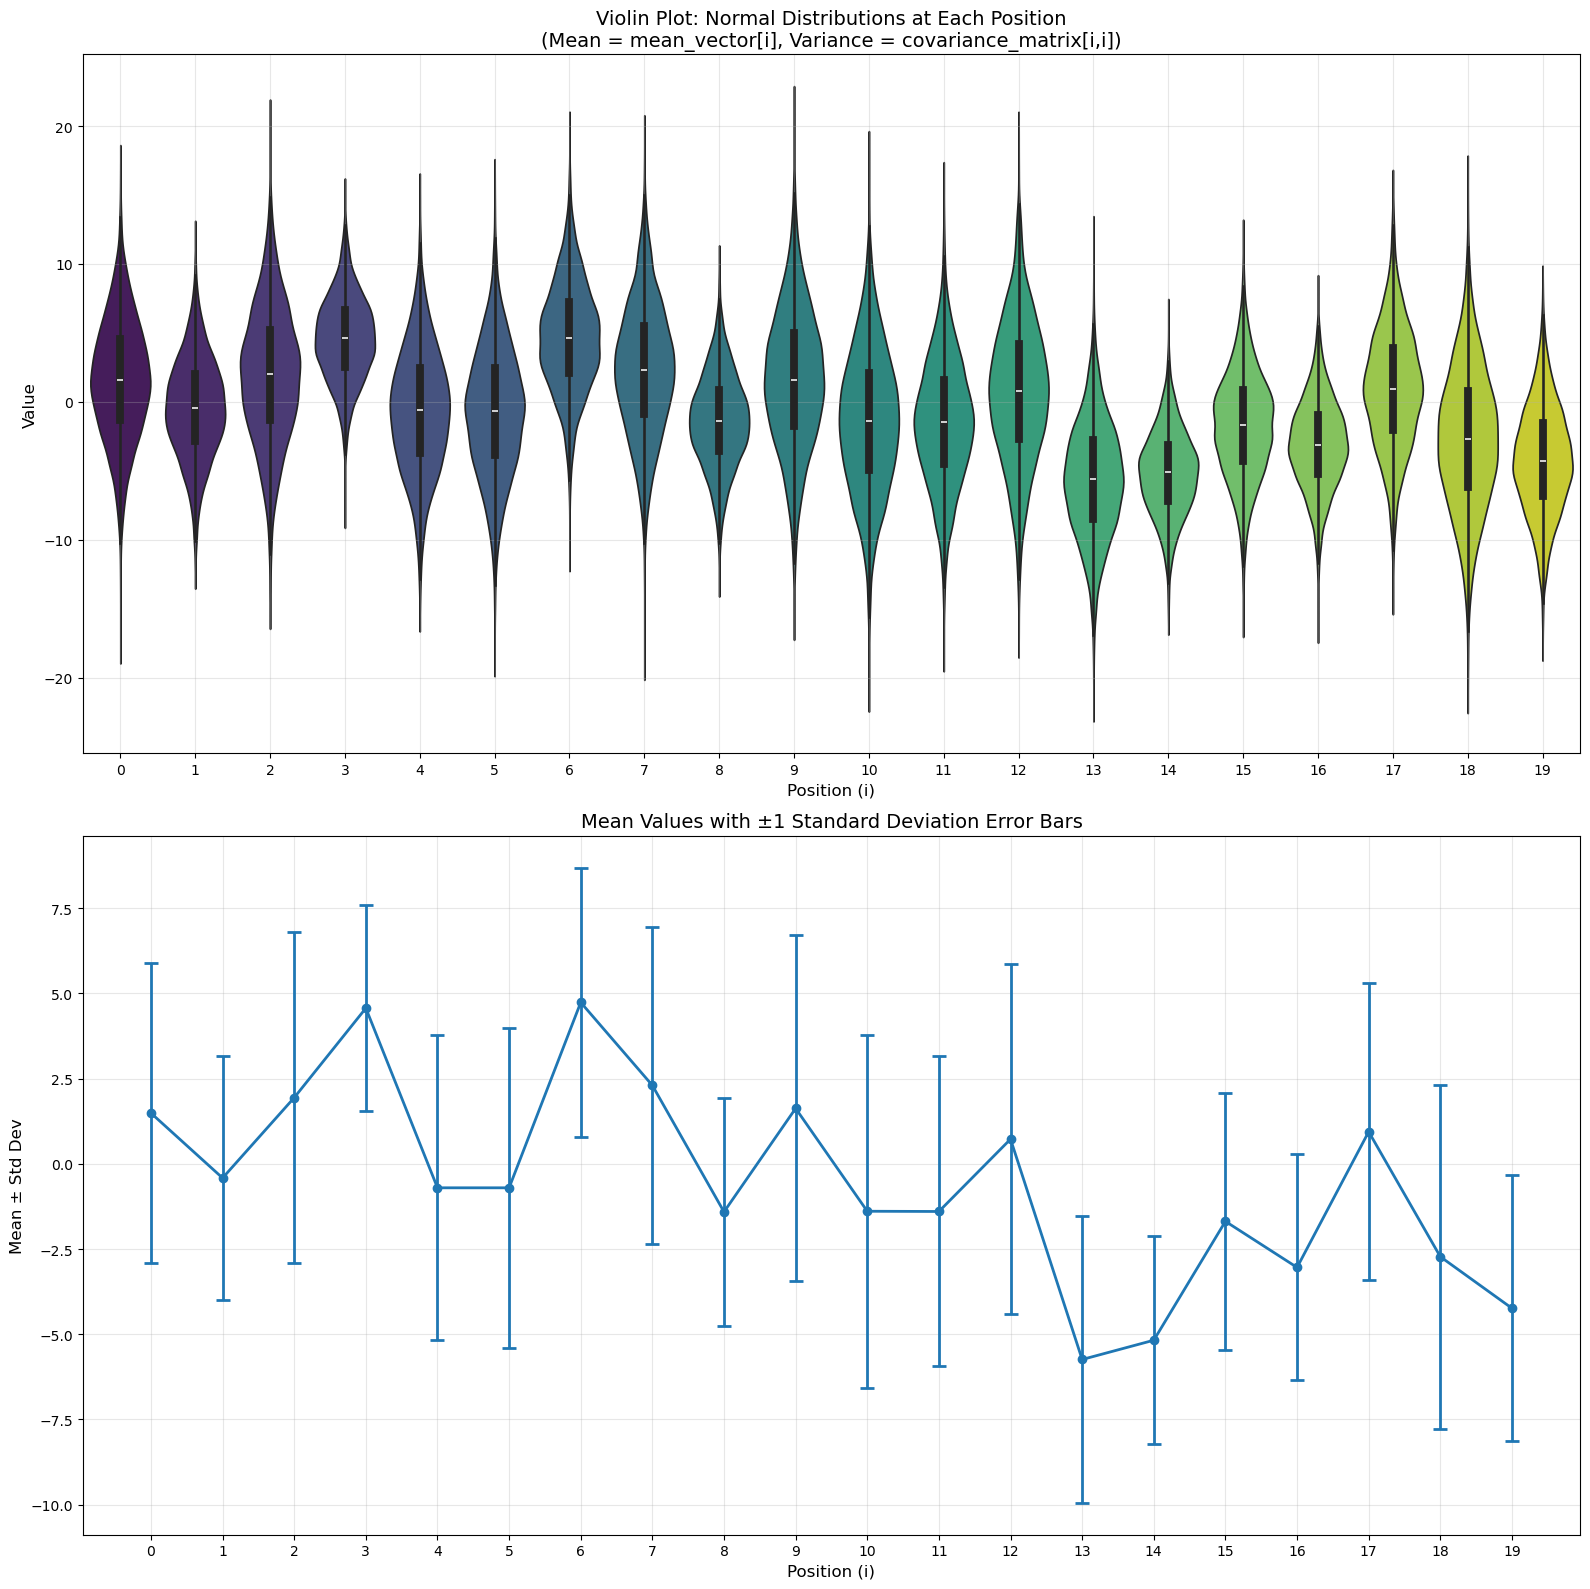


Summary Statistics:
Mean vector range: [-5.740, 4.738]
Standard deviation range: [3.030, 5.184]


In [6]:
# Create violin plot showing normal distributions at each position
import seaborn as sns
from scipy.stats import norm

# Create figure
plt.figure(figsize=(16, 16))

# Generate samples for each position
n_samples = 5000
violin_data = []
positions = []

for i in range(20):
    # Get mean and variance for position i
    mean_i = mean_vector[i]
    variance_i = covariance_matrix[i, i]
    std_i = np.sqrt(variance_i)
    
    # Generate samples from normal distribution
    samples = np.random.normal(mean_i, std_i, n_samples)
    
    # Store data for violin plot
    violin_data.extend(samples)
    positions.extend([i] * n_samples)

# Create violin plot using seaborn
plt.subplot(2, 1, 1)
violin_plot_data = {'Position': positions, 'Value': violin_data}
import pandas as pd
df = pd.DataFrame(violin_plot_data)

sns.violinplot(data=df, x='Position', y='Value', inner='box', palette='viridis')
plt.title('Violin Plot: Normal Distributions at Each Position\n(Mean = mean_vector[i], Variance = covariance_matrix[i,i])', fontsize=14)
plt.xlabel('Position (i)', fontsize=12)
plt.ylabel('Value', fontsize=12)
plt.xticks(range(20))
plt.grid(True, alpha=0.3)

# Create a second subplot showing the means and standard deviations
plt.subplot(2, 1, 2)
positions_array = np.arange(20)
std_array = np.sqrt(np.diag(covariance_matrix))

# Plot means with error bars showing ±1 standard deviation
plt.errorbar(positions_array, mean_vector, yerr=std_array, 
             fmt='o-', capsize=5, capthick=2, linewidth=2, markersize=6)
plt.title('Mean Values with ±1 Standard Deviation Error Bars', fontsize=14)
plt.xlabel('Position (i)', fontsize=12)
plt.ylabel('Mean ± Std Dev', fontsize=12)
plt.xticks(range(20))
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print summary statistics
print("\nSummary Statistics:")
print(f"Mean vector range: [{np.min(mean_vector):.3f}, {np.max(mean_vector):.3f}]")
print(f"Standard deviation range: [{np.min(std_array):.3f}, {np.max(std_array):.3f}]")

2D Mean vector for positions (5, 11): [-0.70241087 -1.39718926]
2D Covariance matrix:
[[22.097227   -2.11015561]
 [-2.11015561 20.67934292]]
Eigenvalues of 2D covariance matrix: [23.61434774 19.16222218]
Is positive definite: True


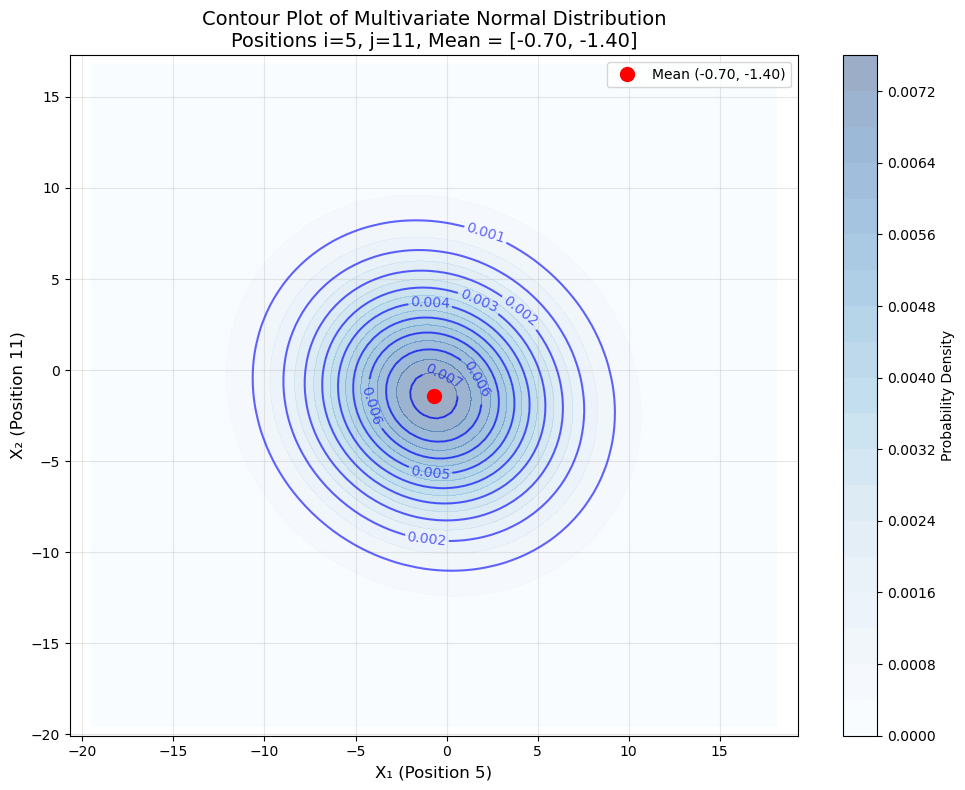


Additional Statistics:
Standard deviation at position 5: 4.701
Standard deviation at position 11: 4.547
Correlation coefficient between positions 5 and 11: -0.099
Covariance between positions 5 and 11: -2.110


In [5]:
# Extract 2D multivariate normal distribution parameters for i=5, j=11
i, j = 5, 11

# Extract the 2D mean vector
mean_2d = np.array([mean_vector[i], mean_vector[j]])

# Extract the 2x2 covariance matrix
cov_2d = np.array([[covariance_matrix[i, i], covariance_matrix[i, j]],
                   [covariance_matrix[j, i], covariance_matrix[j, j]]])

print(f"2D Mean vector for positions ({i}, {j}): {mean_2d}")
print(f"2D Covariance matrix:\n{cov_2d}")

# Verify that the covariance matrix is positive definite
eigenvals_2d = np.linalg.eigvals(cov_2d)
print(f"Eigenvalues of 2D covariance matrix: {eigenvals_2d}")
print(f"Is positive definite: {np.all(eigenvals_2d > 0)}")

# Create a grid of points for the contour plot
# Determine appropriate range based on means and standard deviations
std_i = np.sqrt(cov_2d[0, 0])
std_j = np.sqrt(cov_2d[1, 1])

x_range = mean_2d[0] + np.array([-4*std_i, 4*std_i])
y_range = mean_2d[1] + np.array([-4*std_j, 4*std_j])

x = np.linspace(x_range[0], x_range[1], 100)
y = np.linspace(y_range[0], y_range[1], 100)
X, Y = np.meshgrid(x, y)

# Stack the grid points into a 2D array
pos = np.dstack((X, Y))

# Create the multivariate normal distribution
rv_2d = multivariate_normal(mean_2d, cov_2d)

# Calculate the probability density function values
Z = rv_2d.pdf(pos)

# Create the contour plot
plt.figure(figsize=(10, 8))
contour = plt.contour(X, Y, Z, levels=10, colors='blue', alpha=0.6)
contourf = plt.contourf(X, Y, Z, levels=20, cmap='Blues', alpha=0.4)

# Add contour labels
plt.clabel(contour, inline=True, fontsize=10, fmt='%.3f')

# Add colorbar
plt.colorbar(contourf, label='Probability Density')

# Mark the mean point
plt.plot(mean_2d[0], mean_2d[1], 'ro', markersize=10, label=f'Mean ({mean_2d[0]:.2f}, {mean_2d[1]:.2f})')

# Add labels and title
plt.xlabel(f'X₁ (Position {i})', fontsize=12)
plt.ylabel(f'X₂ (Position {j})', fontsize=12)
plt.title(f'Contour Plot of Multivariate Normal Distribution\nPositions i={i}, j={j}, Mean = [{mean_2d[0]:.2f}, {mean_2d[1]:.2f}]', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)

# Make the plot square to preserve aspect ratio
plt.axis('equal')

plt.tight_layout()
plt.show()

# Print additional statistics
correlation = cov_2d[0, 1] / (std_i * std_j)
print(f"\nAdditional Statistics:")
print(f"Standard deviation at position {i}: {std_i:.3f}")
print(f"Standard deviation at position {j}: {std_j:.3f}")
print(f"Correlation coefficient between positions {i} and {j}: {correlation:.3f}")
print(f"Covariance between positions {i} and {j}: {cov_2d[0, 1]:.3f}")

In [6]:
# Create new structured mean vector and covariance matrix
# Mean vector: zero everywhere
mean_vector_new = np.zeros(20)

# Covariance matrix: 1 on diagonal, 0.8^(-abs(i-j)) on off-diagonal
covariance_matrix_new = np.zeros((20, 20))

for i in range(20):
    for j in range(20):
        if i == j:
            covariance_matrix_new[i, j] = 1.0  # Diagonal elements
        else:
            covariance_matrix_new[i, j] = 0.8**abs(i-j)  # Off-diagonal elements

print(f"New mean vector shape: {mean_vector_new.shape}")
print(f"New covariance matrix shape: {covariance_matrix_new.shape}")
print(f"Mean vector (all zeros): {mean_vector_new}")
print(f"Diagonal of covariance matrix (all ones): {np.diag(covariance_matrix_new)}")

# Show some off-diagonal elements
print(f"Covariance[0,1] = 0.8^1 = {covariance_matrix_new[0,1]:.3f}")
print(f"Covariance[0,2] = 0.8^2 = {covariance_matrix_new[0,2]:.3f}")
print(f"Covariance[0,5] = 0.8^5 = {covariance_matrix_new[0,5]:.6f}")

# Verify positive definiteness by checking eigenvalues
eigenvalues_new = np.linalg.eigvals(covariance_matrix_new)
print(f"Minimum eigenvalue: {np.min(eigenvalues_new):.6f} (should be positive)")
print(f"All eigenvalues positive: {np.all(eigenvalues_new > 0)}")

New mean vector shape: (20,)
New covariance matrix shape: (20, 20)
Mean vector (all zeros): [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Diagonal of covariance matrix (all ones): [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Covariance[0,1] = 0.8^1 = 0.800
Covariance[0,2] = 0.8^2 = 0.640
Covariance[0,5] = 0.8^5 = 0.327680
Minimum eigenvalue: 0.111783 (should be positive)
All eigenvalues positive: True


LaTeX representation of the covariance matrix structure:
(Showing first 6x6 submatrix as example)


<IPython.core.display.Latex object>


Numerical values for the 6x6 submatrix:
         j=0     j=1    j=2    j=3     j=4      j=5
i=0  1.00000  0.8000  0.640  0.512  0.4096  0.32768
i=1  0.80000  1.0000  0.800  0.640  0.5120  0.40960
i=2  0.64000  0.8000  1.000  0.800  0.6400  0.51200
i=3  0.51200  0.6400  0.800  1.000  0.8000  0.64000
i=4  0.40960  0.5120  0.640  0.800  1.0000  0.80000
i=5  0.32768  0.4096  0.512  0.640  0.8000  1.00000

Pattern explanation:
- Diagonal elements (i=j): 1.0
- Off-diagonal elements: 0.8^|i-j|
- Examples:
  Distance 1: 0.8^1 = 0.800000
  Distance 2: 0.8^2 = 0.640000
  Distance 3: 0.8^3 = 0.512000
  Distance 4: 0.8^4 = 0.409600
  Distance 5: 0.8^5 = 0.327680


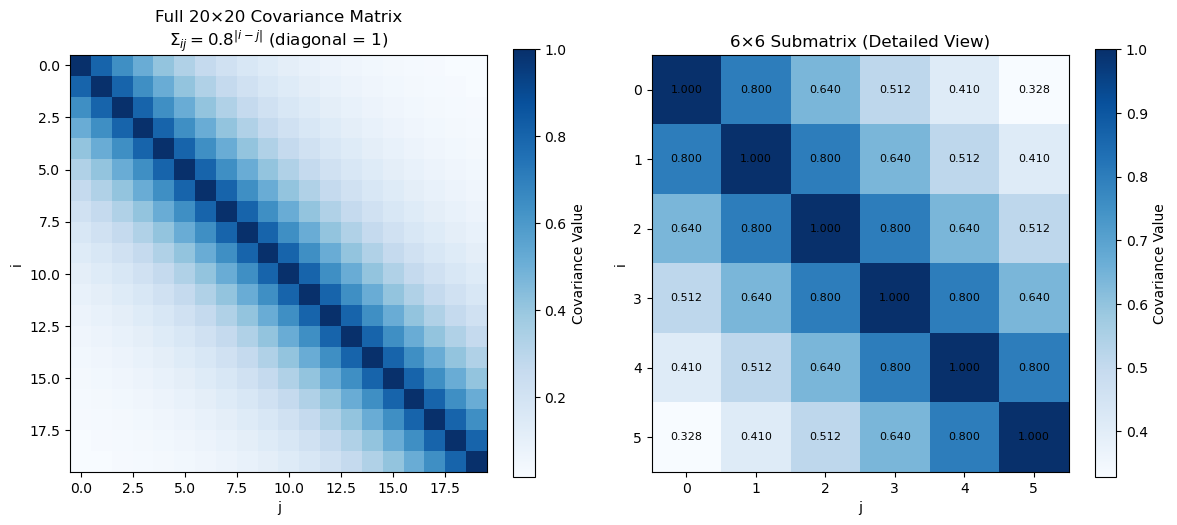

In [11]:
# Create LaTeX representation of the covariance matrix
from IPython.display import display, Markdown, Latex
import pandas as pd

# Create a smaller version for display (first 6x6 submatrix)
display_size = 6
cov_display = covariance_matrix_new[:display_size, :display_size]

print("LaTeX representation of the covariance matrix structure:")
print("(Showing first 6x6 submatrix as example)")

# Create LaTeX string with numerical values rounded to 2 decimal places
latex_str = r"\begin{bmatrix}"
for i in range(display_size):
    row_str = ""
    for j in range(display_size):
        if i == j:
            row_str += "1.00"
        else:
            value = 0.8**abs(i-j)
            row_str += f"{value:.2f}"
        if j < display_size - 1:
            row_str += " & "
    latex_str += row_str
    if i < display_size - 1:
        latex_str += r" \\"
latex_str += r"\end{bmatrix}"

# Display the LaTeX
display(Latex(r"$$\Sigma = " + latex_str + "$$"))

# Also show the numerical values
print(f"\nNumerical values for the 6x6 submatrix:")
df_display = pd.DataFrame(cov_display, 
                         index=[f'i={i}' for i in range(display_size)],
                         columns=[f'j={j}' for j in range(display_size)])
print(df_display.round(6))

# Show the pattern more clearly
print(f"\nPattern explanation:")
print(f"- Diagonal elements (i=j): 1.0")
print(f"- Off-diagonal elements: 0.8^|i-j|")
print(f"- Examples:")
for dist in range(1, 6):
    print(f"  Distance {dist}: 0.8^{dist} = {0.8**dist:.6f}")

# Visualize the covariance matrix
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.imshow(covariance_matrix_new, cmap='Blues', aspect='equal')
plt.colorbar(label='Covariance Value')
plt.title('Full 20×20 Covariance Matrix\n$\\Sigma_{ij} = 0.8^{|i-j|}$ (diagonal = 1)', fontsize=12)
plt.xlabel('j')
plt.ylabel('i')

plt.subplot(1, 2, 2)
plt.imshow(cov_display, cmap='Blues', aspect='equal')
plt.colorbar(label='Covariance Value')
plt.title('6×6 Submatrix (Detailed View)', fontsize=12)
plt.xlabel('j')
plt.ylabel('i')
for i in range(display_size):
    for j in range(display_size):
        plt.text(j, i, f'{cov_display[i,j]:.3f}', 
                ha='center', va='center', fontsize=8)

plt.tight_layout()
plt.show()

C:\Users\tmlouw\AppData\Local\Temp\ipykernel_33316\3823770047.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_new, x='Position', y='Value', inner='box', palette='viridis')


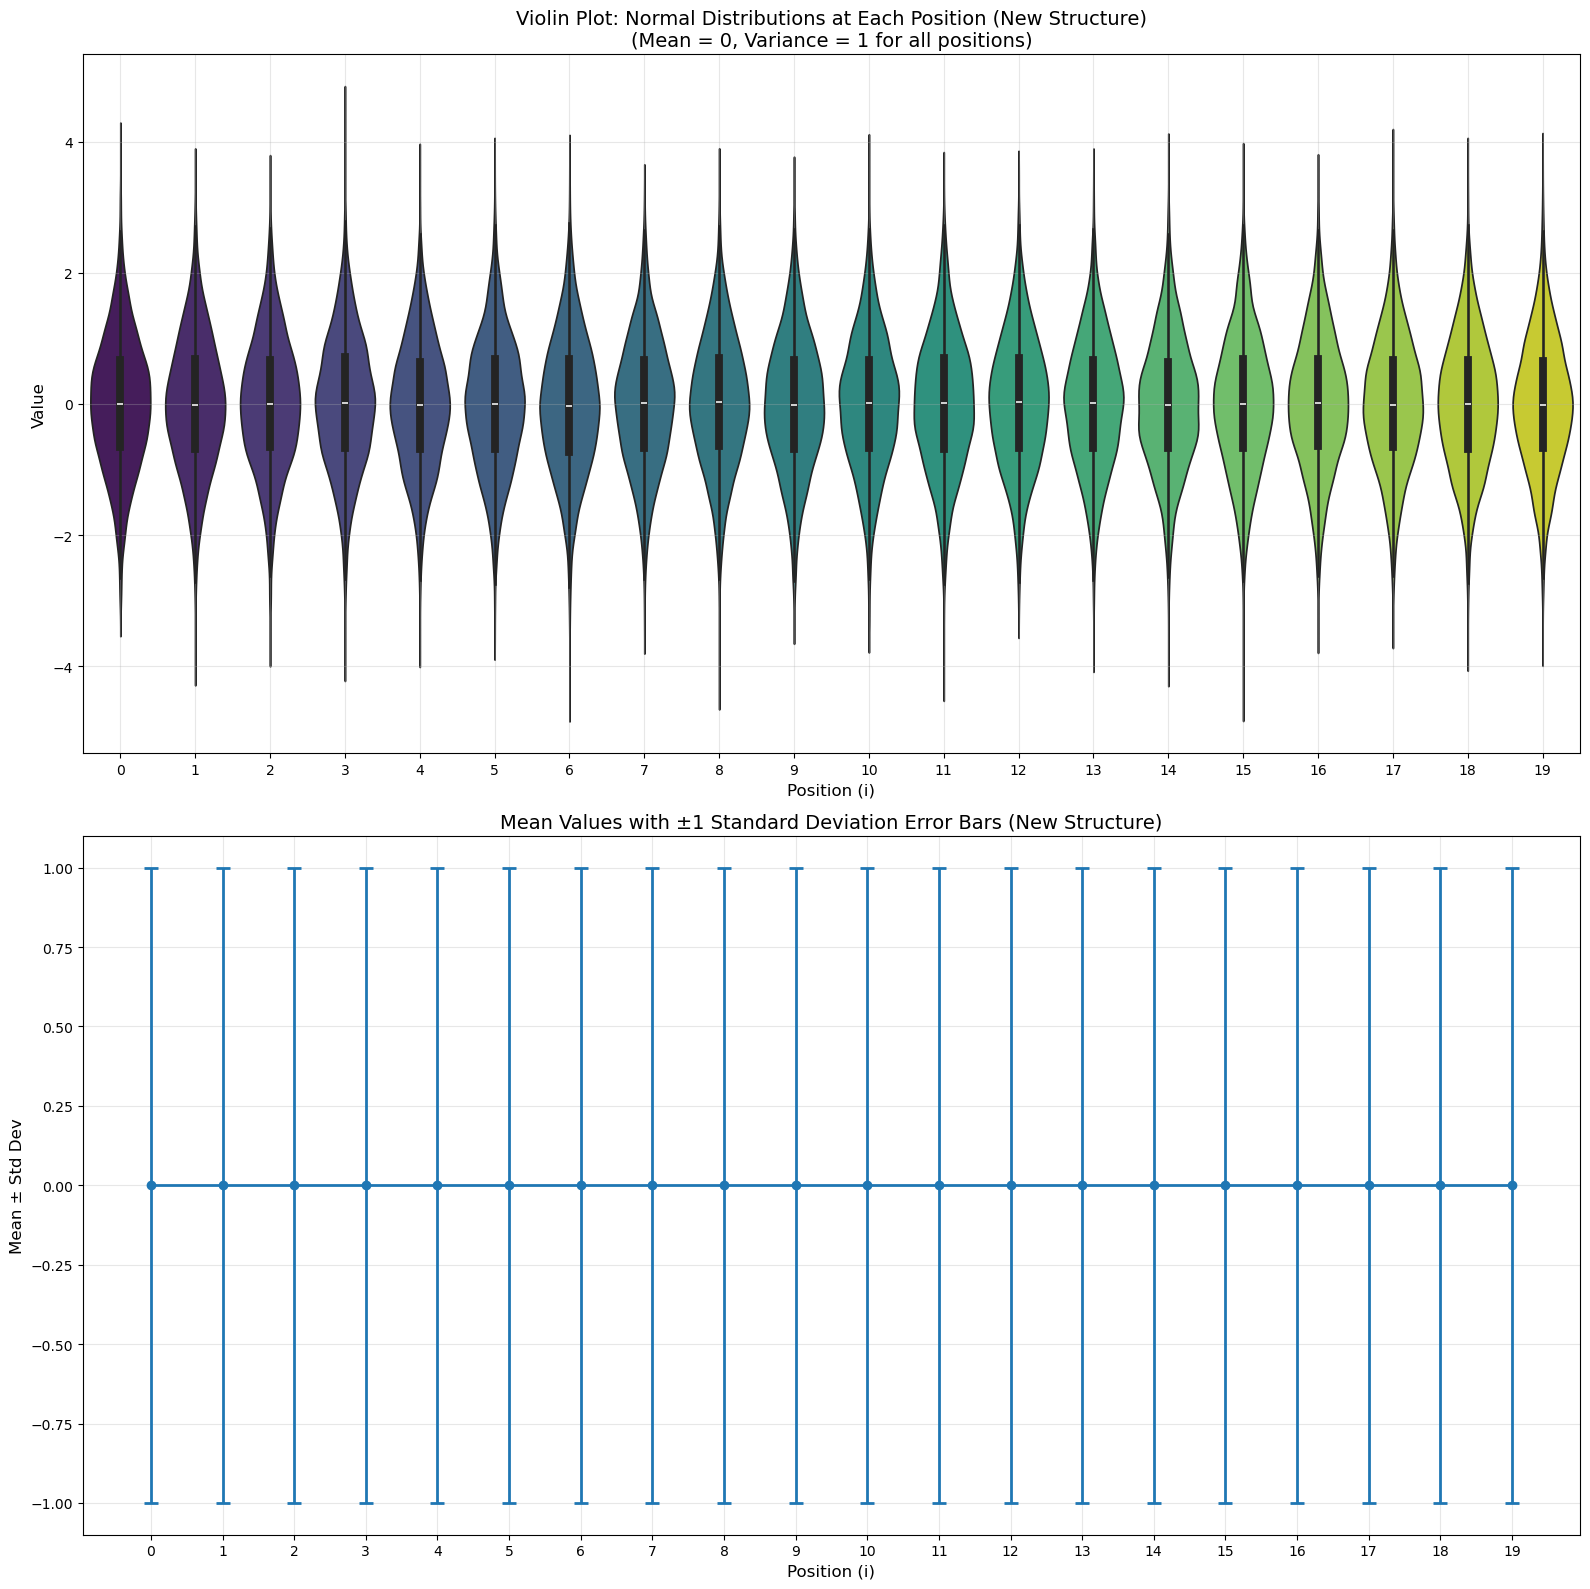


Summary Statistics for New Structure:
Mean vector range: [0.000, 0.000]
Standard deviation range: [1.000, 1.000]
All means are 0, all standard deviations are 1


In [8]:
# Create violin plot for the new structured distribution
import seaborn as sns
from scipy.stats import norm

# Create figure
plt.figure(figsize=(16, 16))

# Generate samples for each position using the new matrices
n_samples = 5000
violin_data_new = []
positions_new = []

for i in range(20):
    # Get mean and variance for position i
    mean_i = mean_vector_new[i]  # Always 0
    variance_i = covariance_matrix_new[i, i]  # Always 1
    std_i = np.sqrt(variance_i)  # Always 1
    
    # Generate samples from normal distribution
    samples = np.random.normal(mean_i, std_i, n_samples)
    
    # Store data for violin plot
    violin_data_new.extend(samples)
    positions_new.extend([i] * n_samples)

# Create violin plot using seaborn
plt.subplot(2, 1, 1)
violin_plot_data_new = {'Position': positions_new, 'Value': violin_data_new}
df_new = pd.DataFrame(violin_plot_data_new)

sns.violinplot(data=df_new, x='Position', y='Value', inner='box', palette='viridis')
plt.title('Violin Plot: Normal Distributions at Each Position (New Structure)\n(Mean = 0, Variance = 1 for all positions)', fontsize=14)
plt.xlabel('Position (i)', fontsize=12)
plt.ylabel('Value', fontsize=12)
plt.xticks(range(20))
plt.grid(True, alpha=0.3)

# Create a second subplot showing the means and standard deviations
plt.subplot(2, 1, 2)
positions_array = np.arange(20)
std_array_new = np.sqrt(np.diag(covariance_matrix_new))

# Plot means with error bars showing ±1 standard deviation
plt.errorbar(positions_array, mean_vector_new, yerr=std_array_new, 
             fmt='o-', capsize=5, capthick=2, linewidth=2, markersize=6)
plt.title('Mean Values with ±1 Standard Deviation Error Bars (New Structure)', fontsize=14)
plt.xlabel('Position (i)', fontsize=12)
plt.ylabel('Mean ± Std Dev', fontsize=12)
plt.xticks(range(20))
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print summary statistics
print("\nSummary Statistics for New Structure:")
print(f"Mean vector range: [{np.min(mean_vector_new):.3f}, {np.max(mean_vector_new):.3f}]")
print(f"Standard deviation range: [{np.min(std_array_new):.3f}, {np.max(std_array_new):.3f}]")
print("All means are 0, all standard deviations are 1")

2D Mean vector for positions (5, 6): [0. 0.]
2D Covariance matrix:
[[1.  0.8]
 [0.8 1. ]]
Distance |i-j| = |5-6| = 1
Off-diagonal covariance = 0.8^1 = 0.800
Eigenvalues of 2D covariance matrix: [1.8 0.2]
Is positive definite: True


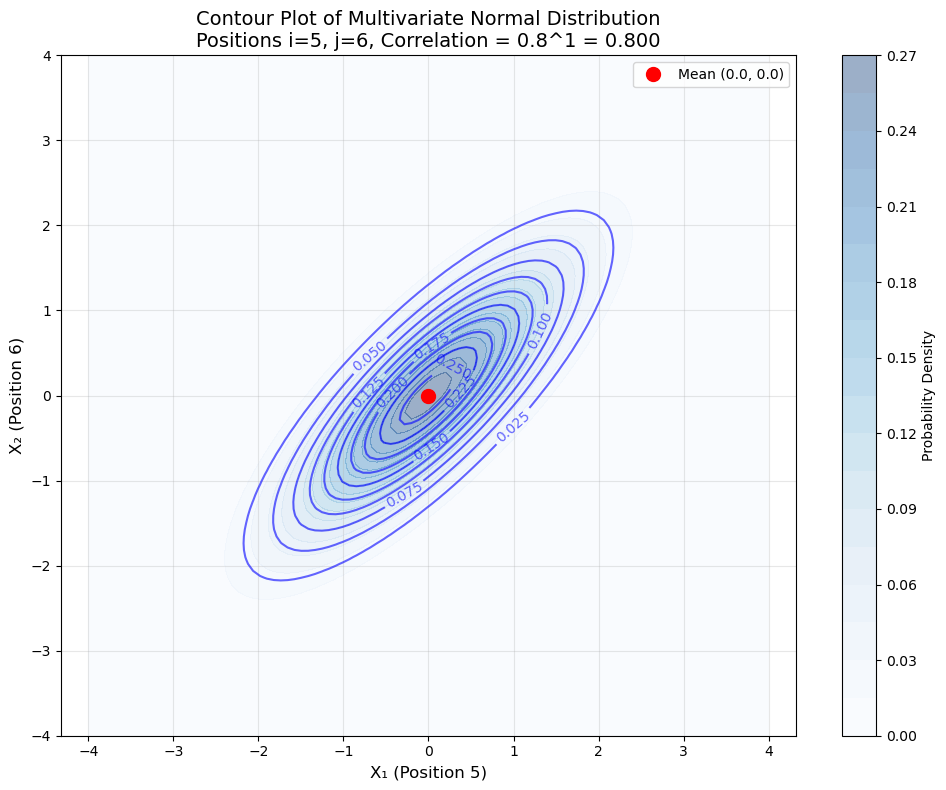


Additional Statistics:
Standard deviation at position 5: 1.000
Standard deviation at position 6: 1.000
Correlation coefficient between positions 5 and 6: 0.800
Covariance between positions 5 and 6: 0.800


In [9]:
# Create contour plot for i=5, j=6 (New Structure)
i, j = 5, 6

# Extract the 2D mean vector
mean_2d_new = np.array([mean_vector_new[i], mean_vector_new[j]])

# Extract the 2x2 covariance matrix
cov_2d_new = np.array([[covariance_matrix_new[i, i], covariance_matrix_new[i, j]],
                       [covariance_matrix_new[j, i], covariance_matrix_new[j, j]]])

print(f"2D Mean vector for positions ({i}, {j}): {mean_2d_new}")
print(f"2D Covariance matrix:\n{cov_2d_new}")
print(f"Distance |i-j| = |{i}-{j}| = {abs(i-j)}")
print(f"Off-diagonal covariance = 0.8^{abs(i-j)} = {0.8**abs(i-j):.3f}")

# Verify that the covariance matrix is positive definite
eigenvals_2d_new = np.linalg.eigvals(cov_2d_new)
print(f"Eigenvalues of 2D covariance matrix: {eigenvals_2d_new}")
print(f"Is positive definite: {np.all(eigenvals_2d_new > 0)}")

# Create a grid of points for the contour plot
# Since mean is zero and std=1, use symmetric range
x = np.linspace(-4, 4, 100)
y = np.linspace(-4, 4, 100)
X, Y = np.meshgrid(x, y)

# Stack the grid points into a 2D array
pos = np.dstack((X, Y))

# Create the multivariate normal distribution
rv_2d_new = multivariate_normal(mean_2d_new, cov_2d_new)

# Calculate the probability density function values
Z = rv_2d_new.pdf(pos)

# Create the contour plot
plt.figure(figsize=(10, 8))
contour = plt.contour(X, Y, Z, levels=10, colors='blue', alpha=0.6)
contourf = plt.contourf(X, Y, Z, levels=20, cmap='Blues', alpha=0.4)

# Add contour labels
plt.clabel(contour, inline=True, fontsize=10, fmt='%.3f')

# Add colorbar
plt.colorbar(contourf, label='Probability Density')

# Mark the mean point
plt.plot(mean_2d_new[0], mean_2d_new[1], 'ro', markersize=10, label=f'Mean ({mean_2d_new[0]:.1f}, {mean_2d_new[1]:.1f})')

# Add labels and title
plt.xlabel(f'X₁ (Position {i})', fontsize=12)
plt.ylabel(f'X₂ (Position {j})', fontsize=12)
plt.title(f'Contour Plot of Multivariate Normal Distribution\nPositions i={i}, j={j}, Correlation = 0.8^{abs(i-j)} = {cov_2d_new[0,1]:.3f}', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)

# Make the plot square to preserve aspect ratio
plt.axis('equal')

plt.tight_layout()
plt.show()

# Print additional statistics
correlation = cov_2d_new[0, 1] / (1.0 * 1.0)  # Since diagonal elements are 1
print(f"\nAdditional Statistics:")
print(f"Standard deviation at position {i}: 1.000")
print(f"Standard deviation at position {j}: 1.000")
print(f"Correlation coefficient between positions {i} and {j}: {correlation:.3f}")
print(f"Covariance between positions {i} and {j}: {cov_2d_new[0, 1]:.3f}")

2D Mean vector for positions (5, 15): [0. 0.]
2D Covariance matrix:
[[1.         0.10737418]
 [0.10737418 1.        ]]
Distance |i-j| = |5-15| = 10
Off-diagonal covariance = 0.8^10 = 0.107374
Eigenvalues of 2D covariance matrix: [1.10737418 0.89262582]
Is positive definite: True


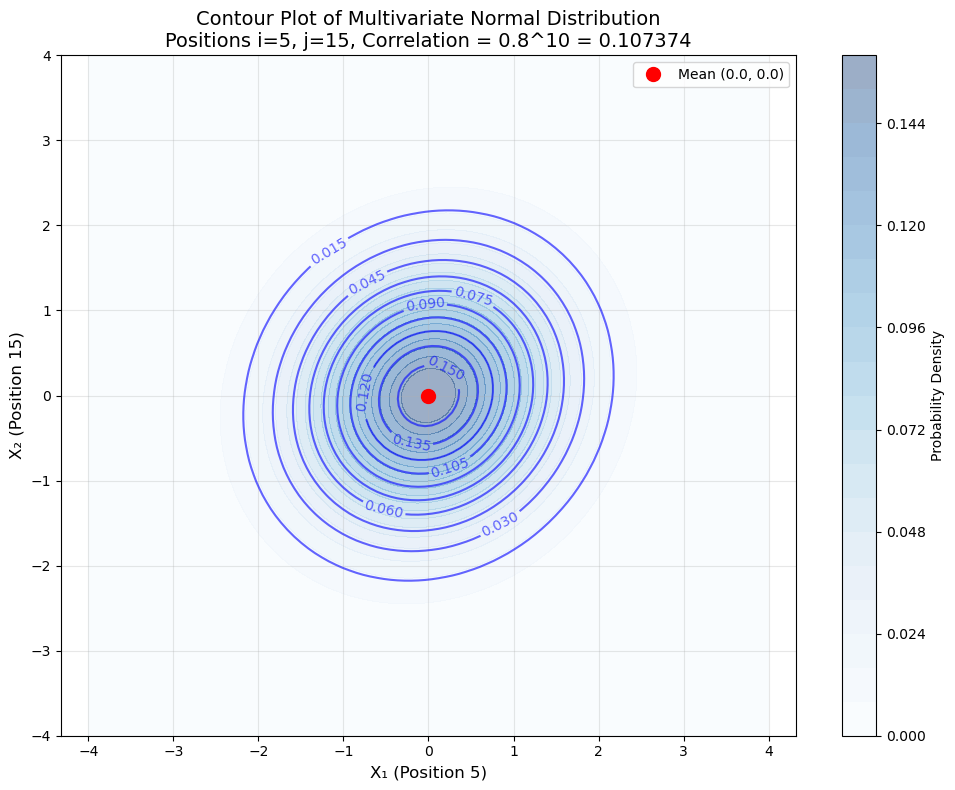


Additional Statistics:
Standard deviation at position 5: 1.000
Standard deviation at position 15: 1.000
Correlation coefficient between positions 5 and 15: 0.107374
Covariance between positions 5 and 15: 0.107374


In [10]:
# Create contour plot for i=5, j=15 (New Structure)
i, j = 5, 15

# Extract the 2D mean vector
mean_2d_new = np.array([mean_vector_new[i], mean_vector_new[j]])

# Extract the 2x2 covariance matrix
cov_2d_new = np.array([[covariance_matrix_new[i, i], covariance_matrix_new[i, j]],
                       [covariance_matrix_new[j, i], covariance_matrix_new[j, j]]])

print(f"2D Mean vector for positions ({i}, {j}): {mean_2d_new}")
print(f"2D Covariance matrix:\n{cov_2d_new}")
print(f"Distance |i-j| = |{i}-{j}| = {abs(i-j)}")
print(f"Off-diagonal covariance = 0.8^{abs(i-j)} = {0.8**abs(i-j):.6f}")

# Verify that the covariance matrix is positive definite
eigenvals_2d_new = np.linalg.eigvals(cov_2d_new)
print(f"Eigenvalues of 2D covariance matrix: {eigenvals_2d_new}")
print(f"Is positive definite: {np.all(eigenvals_2d_new > 0)}")

# Create a grid of points for the contour plot
# Since mean is zero and std=1, use symmetric range
x = np.linspace(-4, 4, 100)
y = np.linspace(-4, 4, 100)
X, Y = np.meshgrid(x, y)

# Stack the grid points into a 2D array
pos = np.dstack((X, Y))

# Create the multivariate normal distribution
rv_2d_new = multivariate_normal(mean_2d_new, cov_2d_new)

# Calculate the probability density function values
Z = rv_2d_new.pdf(pos)

# Create the contour plot
plt.figure(figsize=(10, 8))
contour = plt.contour(X, Y, Z, levels=10, colors='blue', alpha=0.6)
contourf = plt.contourf(X, Y, Z, levels=20, cmap='Blues', alpha=0.4)

# Add contour labels
plt.clabel(contour, inline=True, fontsize=10, fmt='%.3f')

# Add colorbar
plt.colorbar(contourf, label='Probability Density')

# Mark the mean point
plt.plot(mean_2d_new[0], mean_2d_new[1], 'ro', markersize=10, label=f'Mean ({mean_2d_new[0]:.1f}, {mean_2d_new[1]:.1f})')

# Add labels and title
plt.xlabel(f'X₁ (Position {i})', fontsize=12)
plt.ylabel(f'X₂ (Position {j})', fontsize=12)
plt.title(f'Contour Plot of Multivariate Normal Distribution\nPositions i={i}, j={j}, Correlation = 0.8^{abs(i-j)} = {cov_2d_new[0,1]:.6f}', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)

# Make the plot square to preserve aspect ratio
plt.axis('equal')

plt.tight_layout()
plt.show()

# Print additional statistics
correlation = cov_2d_new[0, 1] / (1.0 * 1.0)  # Since diagonal elements are 1
print(f"\nAdditional Statistics:")
print(f"Standard deviation at position {i}: 1.000")
print(f"Standard deviation at position {j}: 1.000")
print(f"Correlation coefficient between positions {i} and {j}: {correlation:.6f}")
print(f"Covariance between positions {i} and {j}: {cov_2d_new[0, 1]:.6f}")

In [ ]:
# Create contour plot for i=5, j=6
i, j = 5, 6

# Extract the 2D mean vector
mean_2d = np.array([mean_vector[i], mean_vector[j]])

# Extract the 2x2 covariance matrix
cov_2d = np.array([[covariance_matrix[i, i], covariance_matrix[i, j]],
                   [covariance_matrix[j, i], covariance_matrix[j, j]]])

print(f"2D Mean vector for positions ({i}, {j}): {mean_2d}")
print(f"2D Covariance matrix:\n{cov_2d}")
print(f"Distance |i-j| = |{i}-{j}| = {abs(i-j)}")
print(f"Off-diagonal covariance = 0.8^{abs(i-j)} = {0.8**abs(i-j):.3f}")

# Verify that the covariance matrix is positive definite
eigenvals_2d = np.linalg.eigvals(cov_2d)
print(f"Eigenvalues of 2D covariance matrix: {eigenvals_2d}")
print(f"Is positive definite: {np.all(eigenvals_2d > 0)}")

# Create a grid of points for the contour plot
# Since mean is zero and std=1, use symmetric range
x = np.linspace(-4, 4, 100)
y = np.linspace(-4, 4, 100)
X, Y = np.meshgrid(x, y)

# Stack the grid points into a 2D array
pos = np.dstack((X, Y))

# Create the multivariate normal distribution
rv_2d = multivariate_normal(mean_2d, cov_2d)

# Calculate the probability density function values
Z = rv_2d.pdf(pos)

# Create the contour plot
plt.figure(figsize=(10, 8))
contour = plt.contour(X, Y, Z, levels=10, colors='blue', alpha=0.6)
contourf = plt.contourf(X, Y, Z, levels=20, cmap='Blues', alpha=0.4)

# Add contour labels
plt.clabel(contour, inline=True, fontsize=10, fmt='%.3f')

# Add colorbar
plt.colorbar(contourf, label='Probability Density')

# Mark the mean point
plt.plot(mean_2d[0], mean_2d[1], 'ro', markersize=10, label=f'Mean ({mean_2d[0]:.1f}, {mean_2d[1]:.1f})')

# Add labels and title
plt.xlabel(f'X₁ (Position {i})', fontsize=12)
plt.ylabel(f'X₂ (Position {j})', fontsize=12)
plt.title(f'Contour Plot of Multivariate Normal Distribution\nPositions i={i}, j={j}, Correlation = 0.8^{abs(i-j)} = {cov_2d[0,1]:.3f}', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)

# Make the plot square to preserve aspect ratio
plt.axis('equal')

plt.tight_layout()
plt.show()

# Print additional statistics
correlation = cov_2d[0, 1] / (1.0 * 1.0)  # Since diagonal elements are 1
print(f"\nAdditional Statistics:")
print(f"Standard deviation at position {i}: 1.000")
print(f"Standard deviation at position {j}: 1.000")
print(f"Correlation coefficient between positions {i} and {j}: {correlation:.3f}")
print(f"Covariance between positions {i} and {j}: {cov_2d[0, 1]:.3f}")

In [ ]:
# Create contour plot for i=5, j=15
i, j = 5, 15

# Extract the 2D mean vector
mean_2d = np.array([mean_vector[i], mean_vector[j]])

# Extract the 2x2 covariance matrix
cov_2d = np.array([[covariance_matrix[i, i], covariance_matrix[i, j]],
                   [covariance_matrix[j, i], covariance_matrix[j, j]]])

print(f"2D Mean vector for positions ({i}, {j}): {mean_2d}")
print(f"2D Covariance matrix:\n{cov_2d}")
print(f"Distance |i-j| = |{i}-{j}| = {abs(i-j)}")
print(f"Off-diagonal covariance = 0.8^{abs(i-j)} = {0.8**abs(i-j):.6f}")

# Verify that the covariance matrix is positive definite
eigenvals_2d = np.linalg.eigvals(cov_2d)
print(f"Eigenvalues of 2D covariance matrix: {eigenvals_2d}")
print(f"Is positive definite: {np.all(eigenvals_2d > 0)}")

# Create a grid of points for the contour plot
# Since mean is zero and std=1, use symmetric range
x = np.linspace(-4, 4, 100)
y = np.linspace(-4, 4, 100)
X, Y = np.meshgrid(x, y)

# Stack the grid points into a 2D array
pos = np.dstack((X, Y))

# Create the multivariate normal distribution
rv_2d = multivariate_normal(mean_2d, cov_2d)

# Calculate the probability density function values
Z = rv_2d.pdf(pos)

# Create the contour plot
plt.figure(figsize=(10, 8))
contour = plt.contour(X, Y, Z, levels=10, colors='blue', alpha=0.6)
contourf = plt.contourf(X, Y, Z, levels=20, cmap='Blues', alpha=0.4)

# Add contour labels
plt.clabel(contour, inline=True, fontsize=10, fmt='%.3f')

# Add colorbar
plt.colorbar(contourf, label='Probability Density')

# Mark the mean point
plt.plot(mean_2d[0], mean_2d[1], 'ro', markersize=10, label=f'Mean ({mean_2d[0]:.1f}, {mean_2d[1]:.1f})')

# Add labels and title
plt.xlabel(f'X₁ (Position {i})', fontsize=12)
plt.ylabel(f'X₂ (Position {j})', fontsize=12)
plt.title(f'Contour Plot of Multivariate Normal Distribution\nPositions i={i}, j={j}, Correlation = 0.8^{abs(i-j)} = {cov_2d[0,1]:.6f}', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)

# Make the plot square to preserve aspect ratio
plt.axis('equal')

plt.tight_layout()
plt.show()

# Print additional statistics
correlation = cov_2d[0, 1] / (1.0 * 1.0)  # Since diagonal elements are 1
print(f"\nAdditional Statistics:")
print(f"Standard deviation at position {i}: 1.000")
print(f"Standard deviation at position {j}: 1.000")
print(f"Correlation coefficient between positions {i} and {j}: {correlation:.6f}")
print(f"Covariance between positions {i} and {j}: {cov_2d[0, 1]:.6f}")